<a href="https://colab.research.google.com/github/NicKostii/UniProjects/blob/main/IDSS/Lab_work_1_(IDSS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабороторна Робота №1
**Варіант**: 3   
**Студент**: Тюкалов Н.  
**Група**: КА-13


## Хід роботи
Написати програму яка реалізує алгоритм градієнтного спуску.  
1. Розглянути функцію вартості:  
  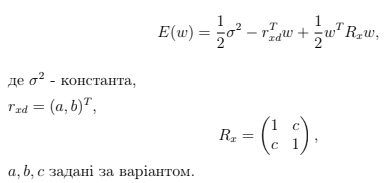   
  Значення **a**,**b** та **с** дорівнюють **0.9**, **0.2** та **0.6** відповідно.


2. Використовуючи метод градiєнтного спуску, обчислити значення w∗(t),
t = 1, 2, ...., T при заданому значеннi параметра швидкостi навчання η, який дорівнює **0.4**, згідно варіанту.

3. Побудувати траєкторiю вектору ваг w(t) у тривимiрному просторi i в
площинi W.

4. Пiдiбрати швидкiсть навчання η1, при якiй алгоритм градiєнтного спу-
ску збiгається. Обрати η2, за якої алгоритм розходиться. Для обох цих випадкiв побудувати траекторiї ваг.

5. Аналогічно розглянути адаптивний алогоритм Adam.



**ЗАУВАЖЕННЯ**: Так як simga^2 це просто константа за умовою, я зроблю її рівною **1**.


## Імпорт

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Початкові дані

In [ ]:
R = np.array([[1, 0.6], [0.6, 1]])
r = np.array([[0.9], [0.2]])
learning_rate = 0.4
iters = 100

## Реалзація алгоритмів GD та Adam

In [ ]:
def loss_function(weight, R, r, sigma_squared = 1):
    loss = 0.5 * sigma_squared - weight.T @ r + 0.5 * weight.T @ R @ weight
    return loss.item()

def gradient_function(weight, R, r):
    gradient = R @ weight - r
    return gradient

def gradient_descent_GD(learning_rate, R, r, iters):
    weight = np.zeros((2, 1))
    w_arr = np.zeros((2, iters))
    loss_arr = np.zeros(iters)

    for i in range(iters):
        loss_arr[i] = loss_function(weight, R, r)
        w_arr[:, i] = weight.flatten()
        gradient = gradient_function(weight, R, r)
        weight -= learning_rate * gradient

    return w_arr, loss_arr, weight

def gradient_descent_Adam(learning_rate, R, r, iters, eps=1e-6, ro=0.9):
    weight = np.zeros((2, 1))
    w_arr = np.zeros((2, iters))
    loss_arr = np.zeros(iters)
    G = np.zeros_like(weight)
    M = np.zeros_like(weight)

    for i in range(iters):
        loss_arr[i] = loss_function(weight, R, r)
        w_arr[:, i] = weight.flatten()
        gradient = gradient_function(weight, R, r)
        G += gradient ** 2
        M = ro * M + (1 - ro) * gradient
        weight -= learning_rate * M / (np.sqrt(G) + eps)

    return w_arr, loss_arr, weight

## Функції для візуалізації

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_loss_trajectory_3D(w_arr, loss_arr):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(w_arr[0], w_arr[1], loss_arr, '-o')
    ax.set_title('Траекторія функції втрат у тривимірному просторі')
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('Функція втрат')
    plt.show()


def plot_loss_trajectory_w(w_arr, loss_arr):
    plt.figure(figsize=(8, 6))
    plt.plot(w_arr[0], w_arr[1], '-o')
    plt.title('Траекторія функції втрат у площині w')
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.grid(True)
    plt.show()

## Обчислення (GD)

In [ ]:
w_arr_GD, loss_arr_GD, opt_weight_GD = gradient_descent_GD(learning_rate, R, r, iters)

In [ ]:
print(f"Остаточні значення ваг (GD): \n{opt_weight_GD}")

Остаточні значення ваг (GD): 
[[ 1.21874998]
 [-0.53124998]]


**Побудуємо графіки**

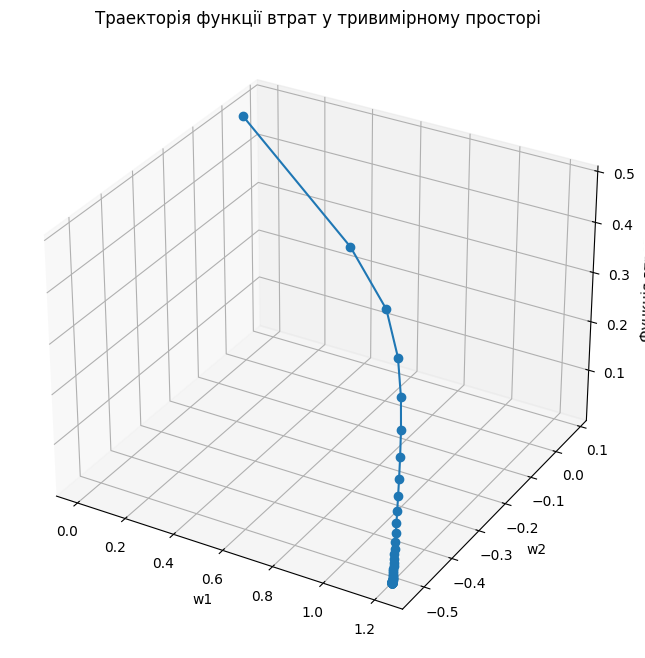

In [ ]:
plot_loss_trajectory_3D(w_arr_GD, loss_arr_GD)

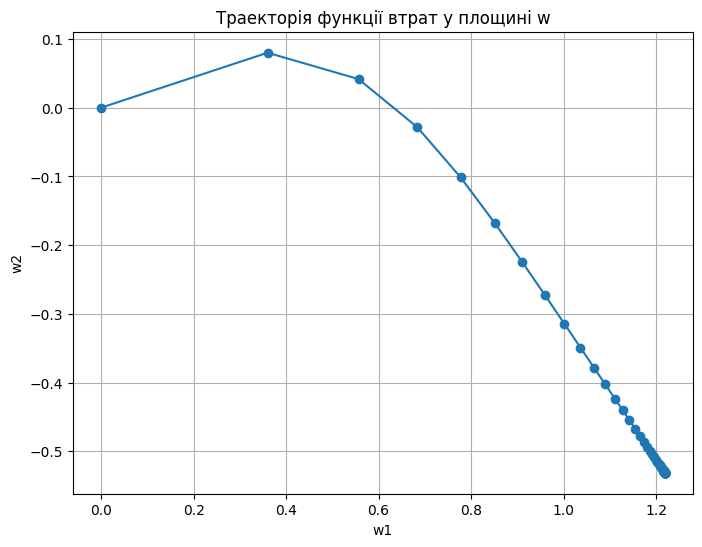

In [ ]:
plot_loss_trajectory_w(w_arr_GD, loss_arr_GD)

**Спробуємо підібрати зависокий параметр η**

In [ ]:
opt_weight_GD_t

array([[-3.27041125e+57],
       [-3.27041125e+57]])

<ipython-input-23-95626408e945>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss_arr[i] = loss_function(weight, R, r)


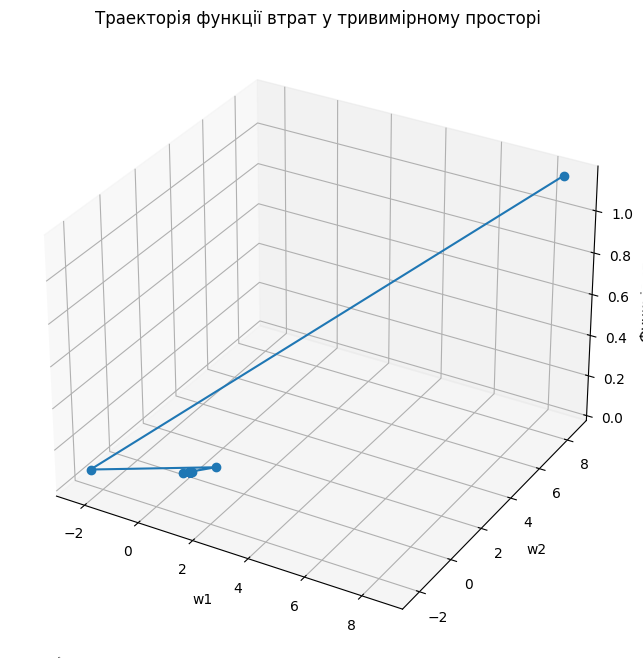

In [ ]:
w_arr_GD_t, loss_arr_GD_t, opt_weight_GD_t = gradient_descent_GD(3.0, R, r, iters)
plot_loss_trajectory_3D(w_arr_GD_t, loss_arr_GD_t)

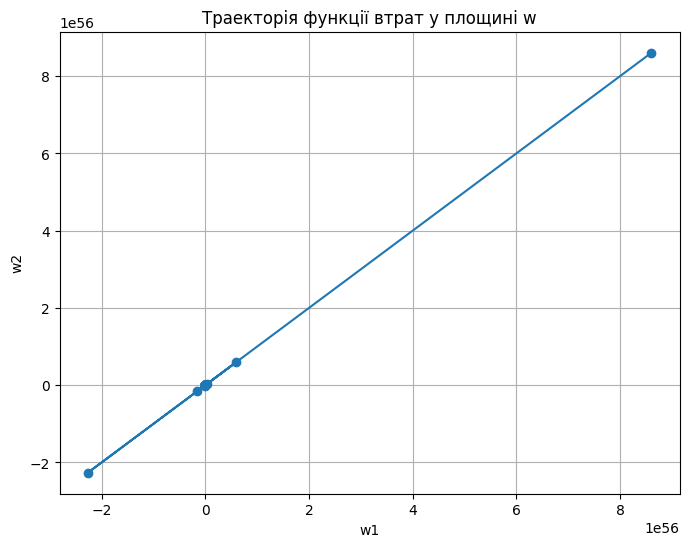

In [ ]:
plot_loss_trajectory_w(w_arr_GD_t, loss_arr_GD_t)

## Обчислення (Adam)

In [ ]:
w_arr_Adam, loss_arr_Adam, opt_weight_Adam = gradient_descent_Adam(learning_rate, R, r, iters)

In [ ]:
print(f"Остаточні значення ваг (GD): \n{opt_weight_Adam}")

Остаточні значення ваг (GD): 
[[ 1.2245672 ]
 [-0.53540555]]


Отже значення майже повністю збіглися з стандартним методом.

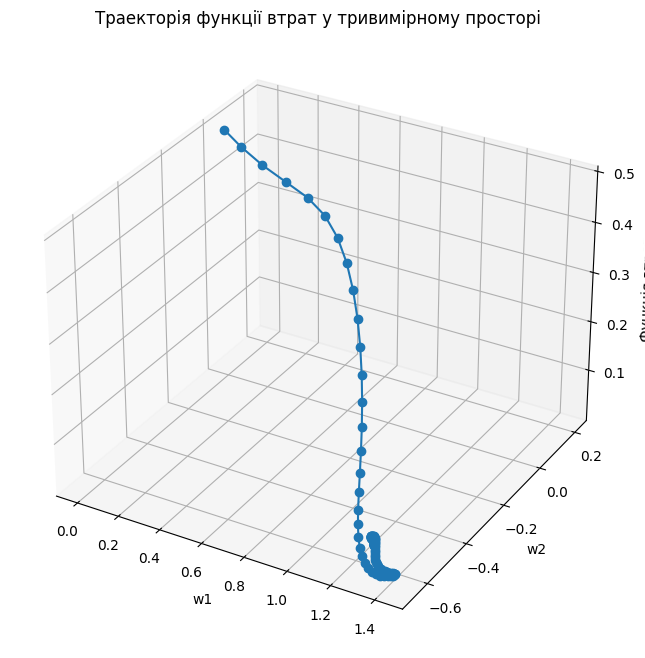

In [ ]:
plot_loss_trajectory_3D(w_arr_Adam, loss_arr_Adam)

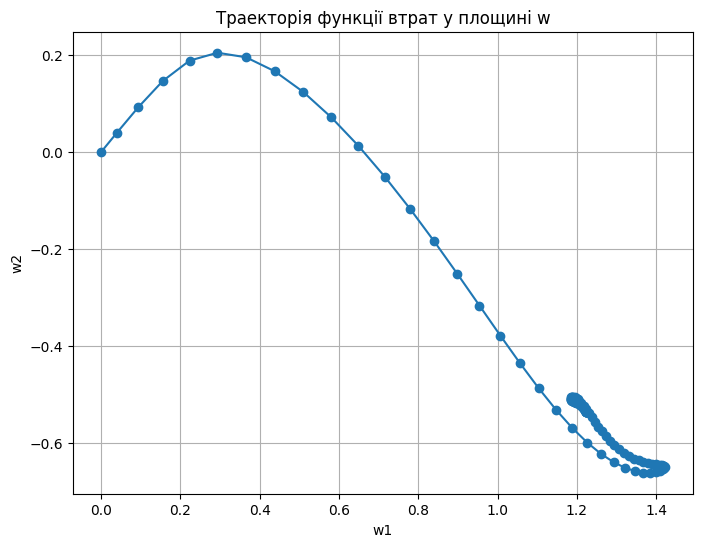

In [ ]:
plot_loss_trajectory_w(w_arr_Adam, loss_arr_Adam)

Візьмемо тепер такий парметр навчання, щоб алгоритм розходився.

In [ ]:
w_arr_Adam_t, loss_arr_Adam_t, opt_weight_Adam_t = gradient_descent_Adam(3.0, R, r, iters)

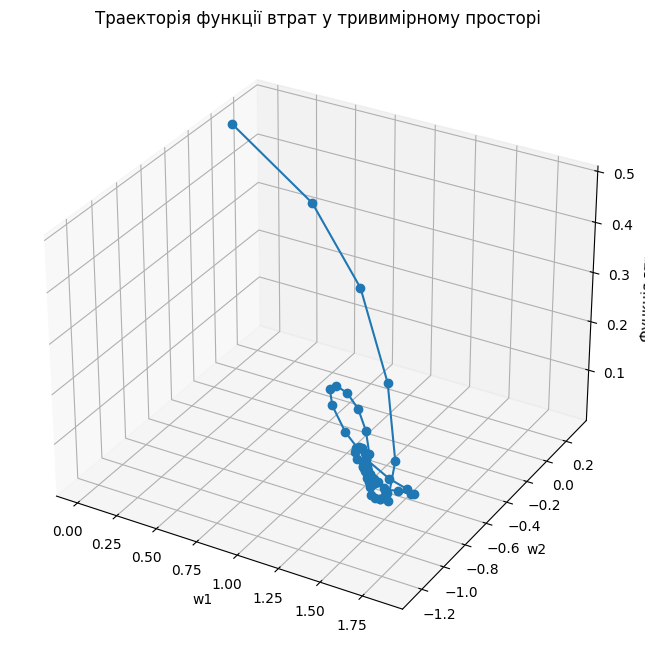

In [ ]:
plot_loss_trajectory_3D(w_arr_Adam_t, loss_arr_Adam_t)

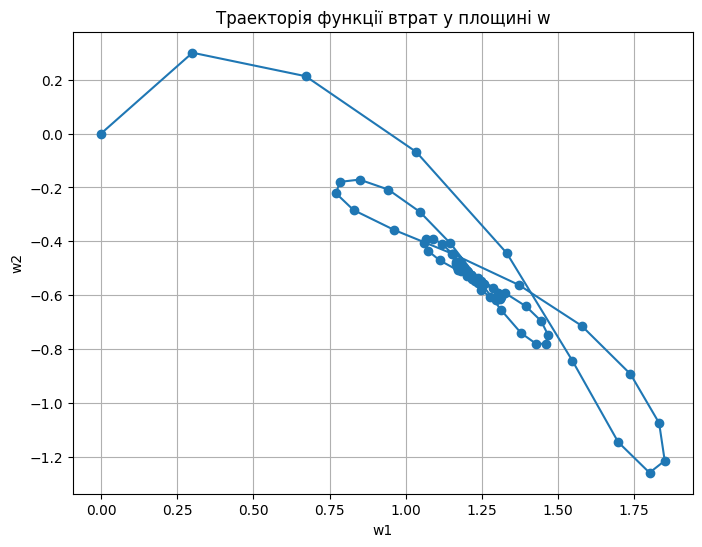

In [ ]:
plot_loss_trajectory_w(w_arr_Adam_t, loss_arr_Adam_t)

## Висновки

В цій роботі я реалізував стаднартний алгоритм градієнтого спуску та адаптивний алгоритм Adam. Було реалзівано дві функції обчислення а також візуалізовано траекторіїї ваг в просторі та площині w.